# Movie Dataset Analysis

Team Members: Akash Mishra , Rahul Bankey, Gopi Chand Yenkipalli, Surya Teja Pidakala ,Shanmukh Peela , Hiranmai Vallabhaneni 

In this project, we will be using a dataset containing movies information from Kaggle.

Our prediction task is to determine whether a movie will be a Superhit or a flop. We are given the input variables that include movie_title, Release_year, runtime, imdb_rating, imdb_votes,worldwide_gross, estimated budget, profit, movie_review . 

To conduct our analysis, we will utilize both a k-NN model and a Decition Tree model.

# Step 1: Install and/or import necessary packages

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

np.random.seed(1)

# Step 2: Load, clean and prepare data for analysis

Read Data (Movies_data.csv)

In [57]:
movies_df = pd.read_csv('.../Movies_data.csv') 
movies_df.head(20)

,MOVIE TITLE,RELEASE YEAR,RUNTIME,IMDB RATING,IMDB VOTES,WORLDWIDE GROSS,ESTIMATED BUDGET,PROFIT,MOVIE REVIEW
0,Avengers: Endgame,2019,181,8.4,748670,2797800564,356000000,2441800564,1
1,Avengers: Infinity War,2018,149,8.4,792818,2048709917,321000000,1727709917,0
2,Harry Potter and the Deathly Hallows: Part 2,2011,130,8.1,741462,1341511219,125000000,1216511219,0
3,The Lord of the Rings: The Return of the King,2003,201,8.9,1600809,1119929521,94000000,1025929521,0
4,Joker,2019,122,8.5,842794,1074251311,55000000,1019251311,0
5,Jurassic Park,1993,127,8.1,902597,1029153882,63000000,966153882,0
6,The Lion King,1994,88,8.5,977800,968483777,45000000,923483777,0
7,Toy Story 3,2010,103,8.3,738152,1068879522,200000000,868879522,0
8,Finding Nemo,2003,100,8.1,926000,936743261,94000000,842743261,1
9,The Dark Knight Rises,2012,164,8.4,1476788,1084939099,250000000,834939099,0


Explore the columns

In [58]:
movies_df.columns

Index(['MOVIE TITLE', 'RELEASE YEAR', 'RUNTIME', 'IMDB RATING', 'IMDB VOTES',
       'WORLDWIDE GROSS', 'ESTIMATED BUDGET', 'PROFIT', 'MOVIE REVIEW'],
      dtype='object')

 Cleaning and Transforming the data

In [68]:
movies_df.columns = [s.strip().upper().replace(' ', '_') for s in movies_df.columns] 

In [69]:
movies_df.columns

Index(['RELEASE_YEAR', 'RUNTIME', 'IMDB_RATING', 'IMDB_VOTES',
       'WORLDWIDE_GROSS', 'ESTIMATED_BUDGET', 'PROFIT', 'MOVIE_REVIEW'],
      dtype='object')

In [70]:
movies_df.info

<bound method DataFrame.info of      RELEASE_YEAR  RUNTIME  IMDB_RATING  IMDB_VOTES  WORLDWIDE_GROSS  \
0            2019      181          8.4      748670       2797800564   
1            2018      149          8.4      792818       2048709917   
2            2011      130          8.1      741462       1341511219   
3            2003      201          8.9     1600809       1119929521   
4            2019      122          8.5      842794       1074251311   
..            ...      ...          ...         ...              ...   
468          1996      108          5.8       14573         12272308   
469          1996      113          6.0       14749          7989000   
470          1997      121          3.9       78231        115900000   
471          1995      178          8.3      984603          4259710   
472          1997       93          7.3      214521           806649   

     ESTIMATED_BUDGET      PROFIT  MOVIE_REVIEW  
0           356000000  2441800564             1  
1  

In [72]:
#dropping the irrelevant column
movies_df = movies_df.drop(columns=['MOVIE_TITLE'])

# check for missing values
movies_df.isnull().sum()

RELEASE_YEAR        0
RUNTIME             0
IMDB_RATING         0
IMDB_VOTES          0
WORLDWIDE_GROSS     0
ESTIMATED_BUDGET    0
PROFIT              0
MOVIE_REVIEW        0
dtype: int64

In [65]:
movies_df.dtypes

RELEASE_YEAR          int64
RUNTIME               int64
IMDB_RATING         float64
IMDB_VOTES            int64
WORLDWIDE_GROSS       int64
ESTIMATED_BUDGET      int64
PROFIT                int64
MOVIE_REVIEW          int64
dtype: object

In [66]:
movies_df.describe()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
count,473.000000,473.000000,473.000000,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,473.000000
mean,1992.416490,118.183932,7.109302,2.944162e+05,1.762117e+08,4.090416e+07,1.353075e+08,0.253700
std,15.010092,24.555670,1.142087,4.035539e+05,2.509800e+08,4.131413e+07,2.243844e+08,0.435589
min,1926.000000,60.000000,3.200000,9.000000e+00,6.500000e+04,1.140000e+05,-8.419335e+07,0.000000
25%,1993.000000,101.000000,6.400000,4.159100e+04,3.640000e+07,1.500000e+07,1.538126e+07,0.000000
50%,1995.000000,115.000000,7.200000,1.210370e+05,1.084314e+08,3.000000e+07,6.688900e+07,0.000000
75%,1997.000000,130.000000,8.100000,3.427530e+05,2.139288e+08,5.500000e+07,1.590467e+08,1.000000
max,2019.000000,238.000000,9.300000,2.446424e+06,2.797801e+09,3.560000e+08,2.441801e+09,1.000000


# Step 3:Partitioning data into training and test data sets


We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [73]:
mtrain_df, mvalidation_df = train_test_split(movies_df, test_size=0.3, random_state=1)

In [74]:
mtrain_df.head()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
244,2018,126,8.4,52444,65814181,4000000,61814181,0
187,1997,124,6.4,111706,159330280,60000000,99330280,0
325,1996,95,5.6,25239,57400547,30000000,27400547,0
98,2004,119,8.2,317521,235184110,24000000,211184110,0
224,1993,125,6.3,43922,107198790,35000000,72198790,0


In [75]:
mvalidation_df.head()

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
179,1998,97,6.9,140401,123306987,18000000,105306987,0
298,1994,142,9.3,2446424,58500000,25000000,33500000,0
31,1993,125,7.0,254341,441286195,25000000,416286195,0
453,1996,98,5.4,8860,2800000,25000000,-22200000,1
247,2018,139,8.3,64955,65276927,4500000,60776927,0


# Step 4: Address any data imbalances

We will utilize an oversamplying technique to address any necessary date balancing.

In [78]:
target = 'MOVIE_REVIEW'
predictors = list(movies_df.columns)
predictors.remove(target)
RanOverSample=RandomOverSampler(sampling_strategy=1)
pred,tar = RanOverSample.fit_resample(mtrain_df[predictors],mtrain_df[target])
tar.value_counts()

0    244
1    244
Name: MOVIE_REVIEW, dtype: int64

In [79]:
predictors

['RELEASE_YEAR',
 'RUNTIME',
 'IMDB_RATING',
 'IMDB_VOTES',
 'WORLDWIDE_GROSS',
 'ESTIMATED_BUDGET',
 'PROFIT']

In [80]:
target

'MOVIE_REVIEW'

Scaling the dataset

In [81]:
# creating a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(mtrain_df[predictors])

StandardScaler()

In [83]:
# Transforming the predictors of training and validation sets
train_predictors = scaler.transform(mtrain_df[predictors]) 
train_target = mtrain_df[target] 

validation_predictors = scaler.transform(mvalidation_df[predictors]) 
validation_target = mvalidation_df[target] 

In [84]:
print(train_predictors[:5], end="\n\n")

[[ 1.71975223  0.37322995  1.14312692 -0.60815037 -0.4253395  -0.84378374
  -0.32495758]
 [ 0.32162384  0.29168598 -0.57950003 -0.45649421 -0.07457679  0.43862526
  -0.16570589]
 [ 0.2550463  -0.89070158 -1.26855081 -0.67777013 -0.45689758 -0.24837956
  -0.47103964]
 [ 0.78766664  0.08782606  0.97086422  0.07020271  0.2099378  -0.38578053
   0.30910121]
 [ 0.05531367  0.33245797 -0.66563138 -0.62995885 -0.27011299 -0.13387876
  -0.28087606]]



In [85]:
print(np.array(train_target[:5]), end="\n\n")


[0 0 0 0 0]



In [86]:
print(validation_predictors[:5], end="\n\n")


[[ 0.38820138 -0.80915761 -0.1488433  -0.38306143 -0.20969393 -0.52318149
  -0.14033544]
 [ 0.12189121  1.02558171  1.91830904  5.51823444 -0.45277373 -0.36288037
  -0.44514813]
 [ 0.05531367  0.33245797 -0.06271195 -0.09147993  0.98299107 -0.36288037
   1.17973682]
 [ 0.2550463  -0.76838562 -1.44081351 -0.71968529 -0.66169479 -0.36288037
  -0.68158846]
 [ 1.71975223  0.90326575  1.05699557 -0.57613373 -0.42735465 -0.83233366
  -0.3293606 ]]



In [87]:
print(np.array(validation_target[:5]), end="\n\n")

[0 0 0 1 0]



In [88]:
mtrain_df.index 

Int64Index([244, 187, 325,  98, 224, 330, 441, 271, 242, 127,
            ...
            448, 335, 133, 203, 393, 255,  72, 396, 235,  37],
           dtype='int64', length=331)

# Train a k-NN model 

Since we know the k-NN models are very sensitive to differences in scale, we have rescaled our variables before fitting the model.

Creating a knn object with default parameters and using k as 23, as it is the root of the dataset values

In [95]:
knn = KNeighborsClassifier(n_neighbors=23,  metric='euclidean') 
knn.fit(train_predictors, train_target)
knn_prediction_output = knn.predict(validation_predictors)
knn_prediction_output

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [96]:
knn_predict_proba_output = knn.predict_proba(validation_predictors)
knn_predict_proba_output[:100, 1].round(2)

array([0.13, 0.74, 0.09, 0.09, 0.13, 0.04, 0.17, 0.3 , 0.22, 0.09, 0.17,
       0.74, 0.13, 0.17, 0.3 , 0.61, 0.09, 0.61, 0.48, 0.26, 0.35, 0.13,
       0.09, 0.57, 0.09, 0.09, 0.26, 0.09, 0.22, 0.57, 0.09, 0.26, 0.43,
       0.13, 0.  , 0.09, 0.17, 0.48, 0.13, 0.61, 0.09, 0.  , 0.  , 0.39,
       0.52, 0.04, 0.09, 0.13, 0.04, 0.09, 0.13, 0.39, 0.26, 0.57, 0.13,
       0.13, 0.09, 0.09, 0.35, 0.09, 0.09, 0.13, 0.87, 0.13, 0.09, 0.09,
       0.22, 0.13, 0.  , 0.48, 0.78, 0.48, 0.61, 0.17, 0.17, 0.26, 0.3 ,
       0.04, 0.  , 0.22, 0.61, 0.22, 0.74, 0.17, 0.22, 0.04, 0.04, 0.17,
       0.17, 0.52, 0.17, 0.09, 0.43, 0.04, 0.13, 0.09, 0.17, 0.09, 0.17,
       0.87])

In [97]:
unique, counts = np.unique(knn_prediction_output, return_counts=True)
dict(zip(unique, counts))

{0: 118, 1: 24}

In [98]:
threshold = 0.1
#knn.fit(train_predictors, train_target)
knn_prediction_output = (knn.predict_proba(validation_predictors)[:,1]>=threshold).astype(int)
unique, counts = np.unique(knn_prediction_output, return_counts=True)


dict(zip(unique, counts))

{0: 47, 1: 95}

In [99]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(validation_target, knn_prediction_output)
confusion

array([[43, 66],
       [ 4, 29]], dtype=int64)

Creation of the confusion matrix

In [101]:
TP = confusion[1, 1] # True Positives
TN = confusion[0, 0] # True Negatives
FP = confusion[0, 1] # False Positives
FN = confusion[1, 0] # False Negatives

In [102]:
classification_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"{classification_accuracy:.4f}")

0.5070


In [103]:
classification_error = (FP + FN) / (TP + TN + FP + FN)
# this is the same as ...
# classification_error = 1-classification_accuracy

print(f"{classification_error:.4f}")

0.4930


In [104]:
precision = TP / (TP + FP)
print(f"{precision:.4f}")

0.3053


In [105]:
recall = TP / (TP + FN)
print(f"{recall:.4f}")

0.8788


In [106]:
f1_Score = (2 * precision * recall) / (precision + recall)
print(f"{f1_Score:.4f}")

0.4531


Checking all the values in the range from 1 to 42

In [108]:
accuracy = []
for i in range(1,42,2):
    knn = KNeighborsClassifier(n_neighbors=i,  metric='euclidean')
    knn.fit(train_predictors, train_target)
#    knn_prediction_output = knn.predict(validation_predictors)
    knn_prediction_output = (knn.predict_proba(validation_predictors)[:,1]>=threshold).astype(int)
    confusion = confusion_matrix(validation_target, knn_prediction_output)
    TP = confusion[1, 1] 
    TN = confusion[0, 0] 
    FP = confusion[0, 1] 
    FN = confusion[1, 0] 
    classification_accuracy = (TP + TN)/(TP + TN + FP + FN)
    print(f"for k = {i} model profit is {classification_accuracy*100:,.4f}")

for k = 1 model profit is 70.4225
for k = 3 model profit is 61.9718
for k = 5 model profit is 55.6338
for k = 7 model profit is 46.4789
for k = 9 model profit is 46.4789
for k = 11 model profit is 58.4507
for k = 13 model profit is 57.7465
for k = 15 model profit is 50.0000
for k = 17 model profit is 47.8873
for k = 19 model profit is 44.3662
for k = 21 model profit is 52.8169
for k = 23 model profit is 50.7042
for k = 25 model profit is 43.6620
for k = 27 model profit is 40.8451
for k = 29 model profit is 40.1408
for k = 31 model profit is 47.8873
for k = 33 model profit is 46.4789
for k = 35 model profit is 45.7746
for k = 37 model profit is 40.8451
for k = 39 model profit is 37.3239
for k = 41 model profit is 45.7746


# Decision Tree

In [109]:
movies_df

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT,MOVIE_REVIEW
0,2019,181,8.4,748670,2797800564,356000000,2441800564,1
1,2018,149,8.4,792818,2048709917,321000000,1727709917,0
2,2011,130,8.1,741462,1341511219,125000000,1216511219,0
3,2003,201,8.9,1600809,1119929521,94000000,1025929521,0
4,2019,122,8.5,842794,1074251311,55000000,1019251311,0
...,...,...,...,...,...,...,...,...
468,1996,108,5.8,14573,12272308,47000000,-34727692,1
469,1996,113,6.0,14749,7989000,50000000,-42011000,0
470,1997,121,3.9,78231,115900000,160000000,-44100000,0
471,1995,178,8.3,984603,4259710,72000000,-67740290,0


In [110]:
X = movies_df[predictors]
X

,RELEASE_YEAR,RUNTIME,IMDB_RATING,IMDB_VOTES,WORLDWIDE_GROSS,ESTIMATED_BUDGET,PROFIT
0,2019,181,8.4,748670,2797800564,356000000,2441800564
1,2018,149,8.4,792818,2048709917,321000000,1727709917
2,2011,130,8.1,741462,1341511219,125000000,1216511219
3,2003,201,8.9,1600809,1119929521,94000000,1025929521
4,2019,122,8.5,842794,1074251311,55000000,1019251311
...,...,...,...,...,...,...,...
468,1996,108,5.8,14573,12272308,47000000,-34727692
469,1996,113,6.0,14749,7989000,50000000,-42011000
470,1997,121,3.9,78231,115900000,160000000,-44100000
471,1995,178,8.3,984603,4259710,72000000,-67740290


In [111]:
y = movies_df[target]
y

0      1
1      0
2      0
3      0
4      0
      ..
468    1
469    0
470    0
471    0
472    0
Name: MOVIE_REVIEW, Length: 473, dtype: int64

In [112]:
train_X,valid_X,train_y,valid_y = train_test_split(X,y,test_size = 0.3,random_state = 1)

Creating the decision tree using the default parameters

In [115]:
dtree = DecisionTreeClassifier(random_state = 1)

Fitting the model to train the dataset

In [116]:
dtree.fit(train_X,train_y)

DecisionTreeClassifier(random_state=1)

Review of the performance of the model on the validation/test data

In [130]:
validation_predictions = dtree.predict(valid_X)

print('Confusion Matrix: ', confusion_matrix(valid_y, validation_predictions))
print('Accuracy score: ', accuracy_score(valid_y, validation_predictions))
print('Precision score: ', precision_score(valid_y, validation_predictions))
print('Recall score: ', recall_score(valid_y, validation_predictions))
print('F1 Score: \n', f1_score(valid_y, validation_predictions))

Confusion Matrix:  [[87 22]
 [15 18]]
Accuracy score:  0.7394366197183099
Precision score:  0.45
Recall score:  0.5454545454545454
F1 Score: 
 0.4931506849315069


In [131]:
train_predictions = dtree.predict(train_X)

print('Confusion Matrix:\n', confusion_matrix(train_y, train_predictions))
print('Accuracy score:\n', accuracy_score(train_y, train_predictions))
print('Precision score:\n', precision_score(train_y, train_predictions))
print('Recall score:\n', recall_score(train_y, train_predictions))
print('F1 Score: \n', f1_score(train_y, train_predictions))

Confusion Matrix:
 [[244   0]
 [  0  87]]
Accuracy score:
 1.0
Precision score:
 1.0
Recall score:
 1.0
F1 Score: 
 1.0


Visualizing the Decision tree

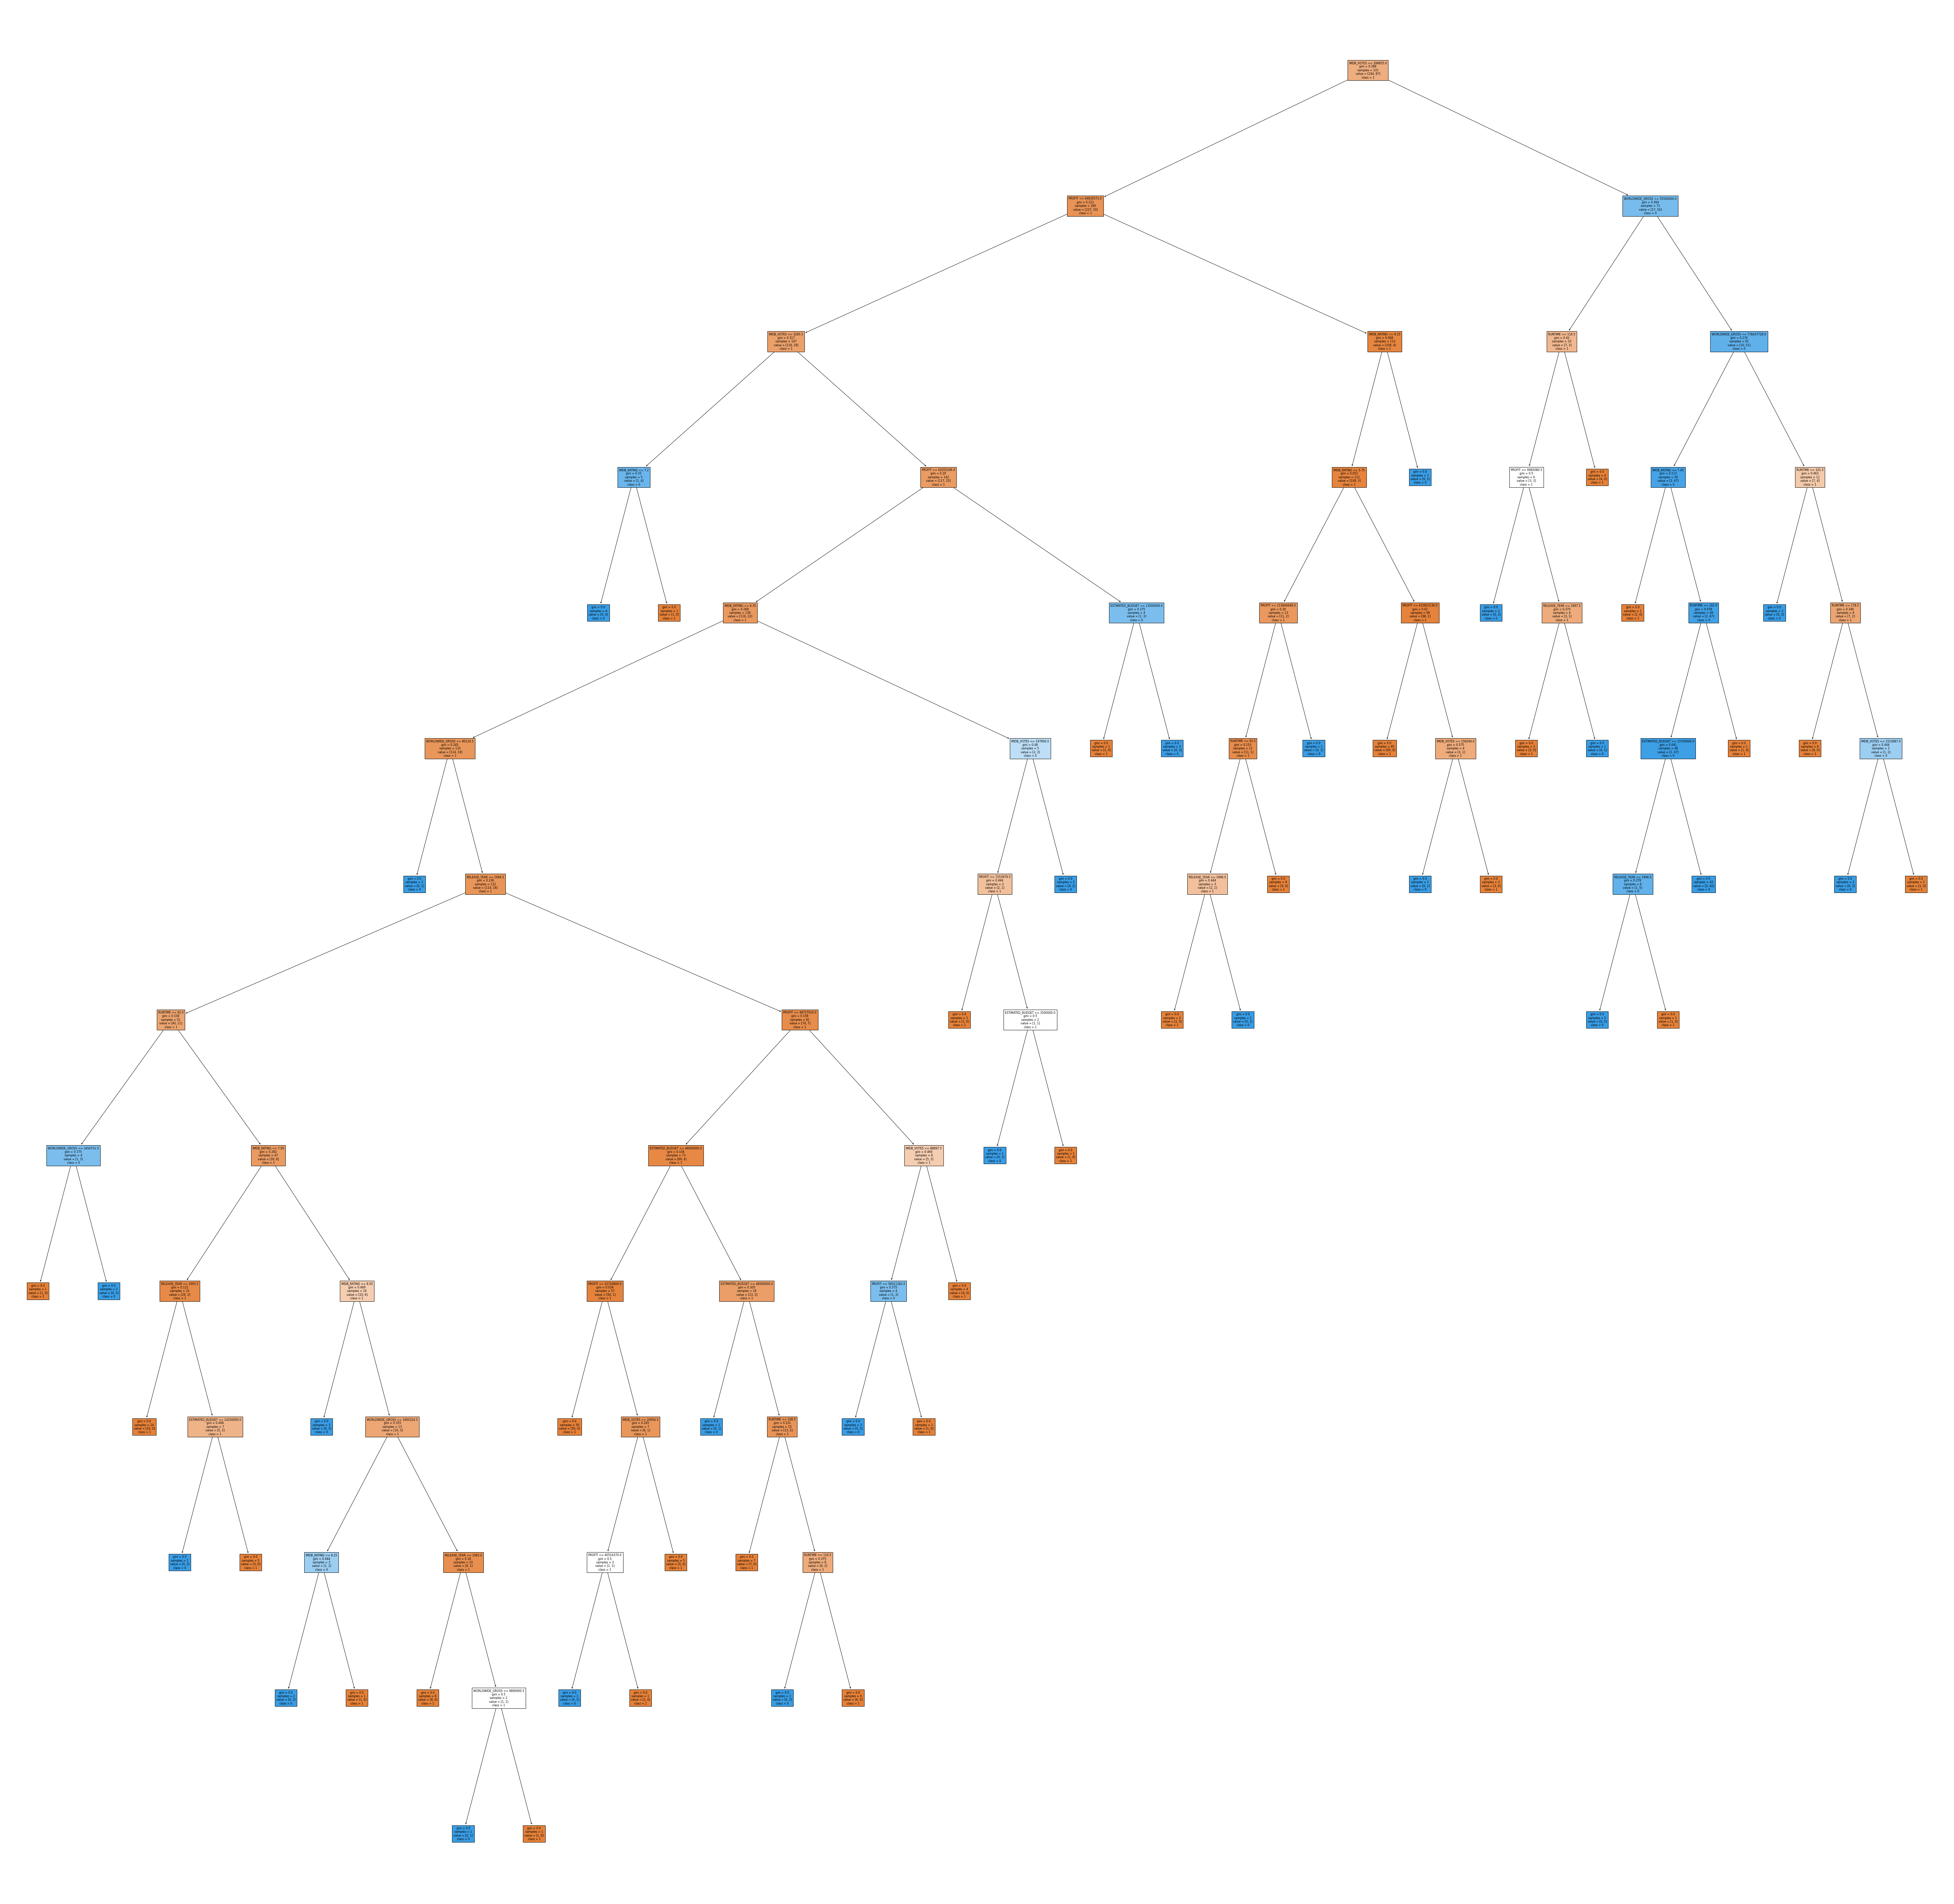

In [122]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(100,100))
_ = plot_tree(dtree, 
                feature_names=X.columns,  
                class_names=['1', '0'],
                filled=True,
                fontsize=8
             )

As text

In [124]:
from sklearn.tree import export_text

text_representation = export_text(dtree)

print(text_representation)

|--- feature_3 <= 398855.00
|   |--- feature_6 <= 64830572.00
|   |   |--- feature_3 <= 3285.50
|   |   |   |--- feature_2 <= 7.20
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  7.20
|   |   |   |   |--- class: 0
|   |   |--- feature_3 >  3285.50
|   |   |   |--- feature_6 <= 62055296.00
|   |   |   |   |--- feature_2 <= 8.35
|   |   |   |   |   |--- feature_4 <= 80124.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  80124.50
|   |   |   |   |   |   |--- feature_0 <= 1994.50
|   |   |   |   |   |   |   |--- feature_1 <= 92.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 3454731.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  3454731.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  92.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 7.95
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 1993.50
|   |   |   |   |   |   |   |   | 

In [ ]:
The accuracy of the model using the Knn technique is 50.70, the error is 49.3 and the precision is 30.53 with recall is 87.88
and f1_score is 45.31.
We used the value of k to be the root of the total values but the best accuracy by Knn came out with k = 1 having accuracy 70.4225

Apart from this 
The accuracy of the model using the decision tree technique for validation is 73.9,  the precision is 45 with recall 54.54
and f1_score is 49.3.
The accuracy of the model using the Decision tree technique is 1, the error is 1 and the precision is 1 with recall 1
and f1_score is 1.

It is easily seen from the above conclusions that Decision Tree outperforms Knn Technique and has a better accuracy score.
